In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
pd.set_option('display.max_columns', 100)

In [82]:
df = pd.read_csv('../clean_data/clean_victimization_data.csv')
df.head(10)

,Year,Weight,Sex,Race,Hispanic origin,Race/Hispanic origin,Age,Marital status,Household income,Population size,Region,Location of residence,Victim-offender relationship,Reporting to the police,Presence of Weapon,Weapon category,Aggregate type of crime,Type of crime,Violent crime excluding simple assault,Injury,Medical treatment for physical injuries,Victim services,Location of incident
0,1995,3463.13071,Male,White,Non-Hispanic,Non-Hispanic white,25 to 34,Never married,"$50,000 to $74,999","250,000 to 499,999",West,Urban,Stanger,"Yes, reported to the police","No, offender did not have weapon",No weapon,Violent victimization,Robbery,Violent crime excluding simple assault,Not injured,Not injured,No services received from victim service agencies,"Commercial place, parking lot, or other public..."
1,1995,2497.65395,Female,White,Non-Hispanic,Non-Hispanic white,35 to 49,Married,"$50,000 to $74,999","Under 100,000",Midwest,Suburban,Stanger,"Yes, reported to the police","No, offender did not have weapon",No weapon,Violent victimization,Simple assault,Simple assault,Not injured,Not injured,No services received from victim service agencies,"Commercial place, parking lot, or other public..."
2,1995,2521.20834,Female,Black,Non-Hispanic,Non-Hispanic black,25 to 34,Never married,"$50,000 to $74,999","Under 100,000",Midwest,Suburban,Stanger,"Yes, reported to the police","Yes, offender had weapon",Knife,Violent victimization,Aggravated assault,Violent crime excluding simple assault,Not injured,Not injured,No services received from victim service agencies,"At or near friend, neighbor, or relative's home"
3,1995,2023.97373,Male,White,Non-Hispanic,Non-Hispanic white,25 to 34,Married,"$25,000 to $34,999",Not a place,South,Suburban,Stanger,"Yes, reported to the police","No, offender did not have weapon",No weapon,Violent victimization,Simple assault,Simple assault,Not injured,Not injured,No services received from victim service agencies,"Commercial place, parking lot, or other public..."
4,1995,12143.84238,Male,White,Non-Hispanic,Non-Hispanic white,25 to 34,Married,"$25,000 to $34,999",Not a place,South,Suburban,Stanger,"Yes, reported to the police","No, offender did not have weapon",No weapon,Violent victimization,Simple assault,Simple assault,Not injured,Not injured,No services received from victim service agencies,"Commercial place, parking lot, or other public..."
5,1995,2958.11943,Female,White,Hispanic,Hispanic,18 to 20,Never married,Unknown,1 million or more,South,Urban,Well-known/casual acquaintances,"Yes, reported to the police","Yes, offender had weapon",Other type weapon,Violent victimization,Aggravated assault,Violent crime excluding simple assault,Not injured,Not injured,No services received from victim service agencies,"At or near friend, neighbor, or relative's home"
6,1995,22320.04780,Female,White,Non-Hispanic,Non-Hispanic white,25 to 34,Divorced,"$25,000 to $34,999",Not a place,South,Rural,Stanger,"No, did not report to the police",Do not know if offender had weapon,Do not know if offender had weapon,Violent victimization,Simple assault,Simple assault,Not injured,Not injured,No services received from victim service agencies,Other location
7,1995,13387.79424,Female,White,Non-Hispanic,Non-Hispanic white,12 to 14,Never married,"$50,000 to $74,999",Not a place,Midwest,Suburban,Well-known/casual acquaintances,"No, did not report to the police","No, offender did not have weapon",No weapon,Violent victimization,Simple assault,Simple assault,Not injured,Not injured,No services received from victim service agencies,School
8,1995,2411.88934,Male,White,Non-Hispanic,Non-Hispanic white,35 to 49,Married,"$75,000 or more","Under 100,000",West,Suburban,Stanger,"No, did not report to the police","No, offender did not have weapon",No weapon,Violent victimization,Simple assault,Simple assault,Injured,Not treated for injury,No services received from victim service agencies,"Commercial place, parking lot, or other public..."
9,1995,2965.66317,Female,Whi

In [83]:
df['Household income'].value_counts()

Unknown               7339
$75,000 or more       6874
$50,000 to $74,999    5750
$35,000 to $49,999    5738
$15,000 to $24,999    5465
$25,000 to $34,999    5091
$7,500 to $14,999     4773
Less than $7,500      3675
Name: Household income, dtype: int64

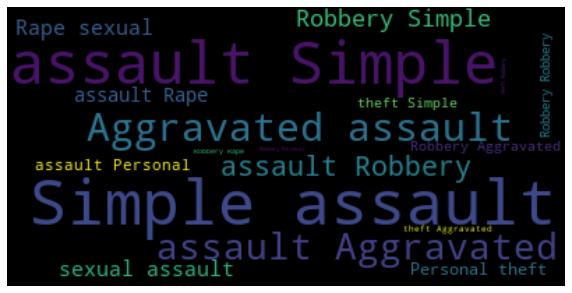

In [84]:
#Created a word cloud for visual impact of subject matter using WordCloud python package
crimetype = " ".join(crime for crime in df["Type of crime"])

crmtypcld = WordCloud().generate(crimetype)

plt.figure(figsize=[10,10])
plt.imshow(crmtypcld, interpolation="bilinear")
plt.axis("off")
plt.show
plt.savefig("WordCloud1")


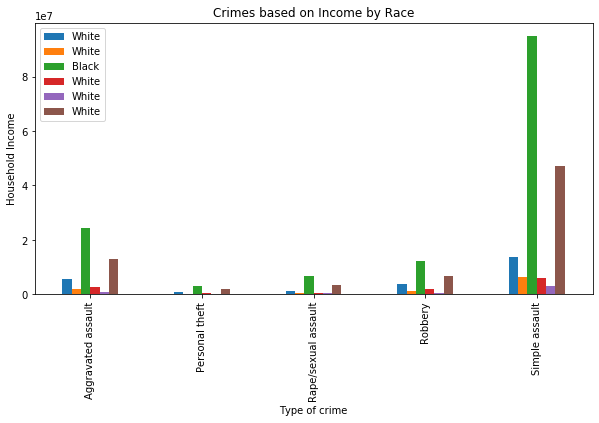

In [85]:
#
#Created a pivot table to see the coralation of type of crime and household income by Race

RCI = (df.pivot_table(index='Type of crime',
                      columns= 'Race',
                      values= df.groupby('Household income').count(),
                      aggfunc=np.sum))
RCI.plot(kind="bar", stacked=False, figsize=(10,5))


plt.title('Crimes based on Income by Race')
plt.ylabel('Household Income')
plt.legend(df['Race'])
plt.savefig("CrimesRaceIncome")
plt.show()

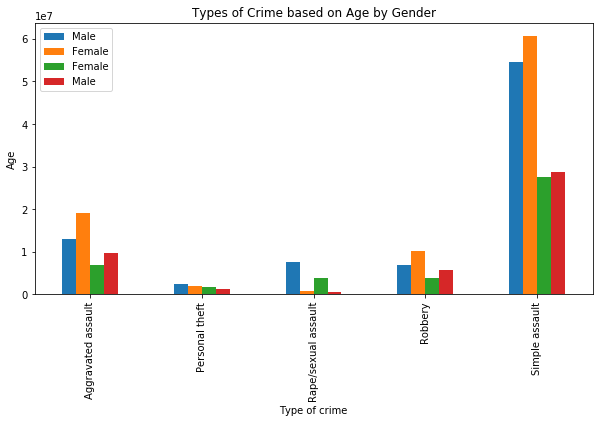

In [86]:
#Created a pivot table to see the coralation of type of crime and gender by age
RSA = (df.pivot_table(index='Type of crime',
                      columns='Sex',
                      values= df.groupby('Age').nunique(),
                      aggfunc='sum'))
RSA.plot(kind="bar", stacked=False, figsize=(10,5))
plt.title('Types of Crime based on Age by Gender')
plt.ylabel('Age')
plt.legend(df['Sex'])
plt.savefig("CrimeAgeGender")
plt.show()